['java', 'python', 'apache', 'django', 'xml', 'ruby-on-rails', 'amazon-web-services', 'go', 'mongodb', 'security', 'testing', '.net', 'c#', 'scala', 'javascript', 't-sql', 'tableau', 'ms-excel', 'r-studio', 'data-modelling', 'inspec', 'pci-dss', 'automation', 'ruby', 'sql', 'cassandra', 'wordpress', 'css', 'html', 'rails', 'asp.net-mvc', 'ssl', 'https', 'json', 'scripting', 'linux', 'vmware', 'activex', 'sysadmin', 'haskell', 'erlang', 'clojure', 'css3', 'reactjs', 'angularjs', 'html5', 'playframework-2.0', 'akka', 'golang', 'python-3.x', 'java-ee', 'ecmascript-6', 'd3.js', 'typescript', 'geospatial', 'cesium', 'rest', 'node.js', 'sass', 'selenium', 'azure', 'angular', 'ui', 'webgl', '3d', 'project-management', 'junit', 'nosql', 'oracle', 'database-performance', 'devops', 'shell', 'ansible', 'asp.net', 'etl', 'agile', 'hadoop', 'spark', 'tsql', 'integration', 'sso', 'kerberos', 'database', 'neo4j', 'typo3', 'shopware', 'ios', 'swift', 'objective-c', 'system.reactive', 'wpf', 'visual-st

C:\Users\galli\Anaconda3\lib\site-packages\ipykernel_launcher.py:202: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Unterföhring Berlin Karlsruhe Graz Stuttgart New York Zürich Hamburg London  \
0            1      7         2    1         1        2      2       2      3   

  Singapore    ...    Milano Charlotte Langenhagen San Francisco Phoenix  \
0         2    ...         1         1           1             1       1   

  Atlanta Nieuwegein Oakland Cambridge San Ramon  
0       1          1       1         1         1  

[1 rows x 43 columns]


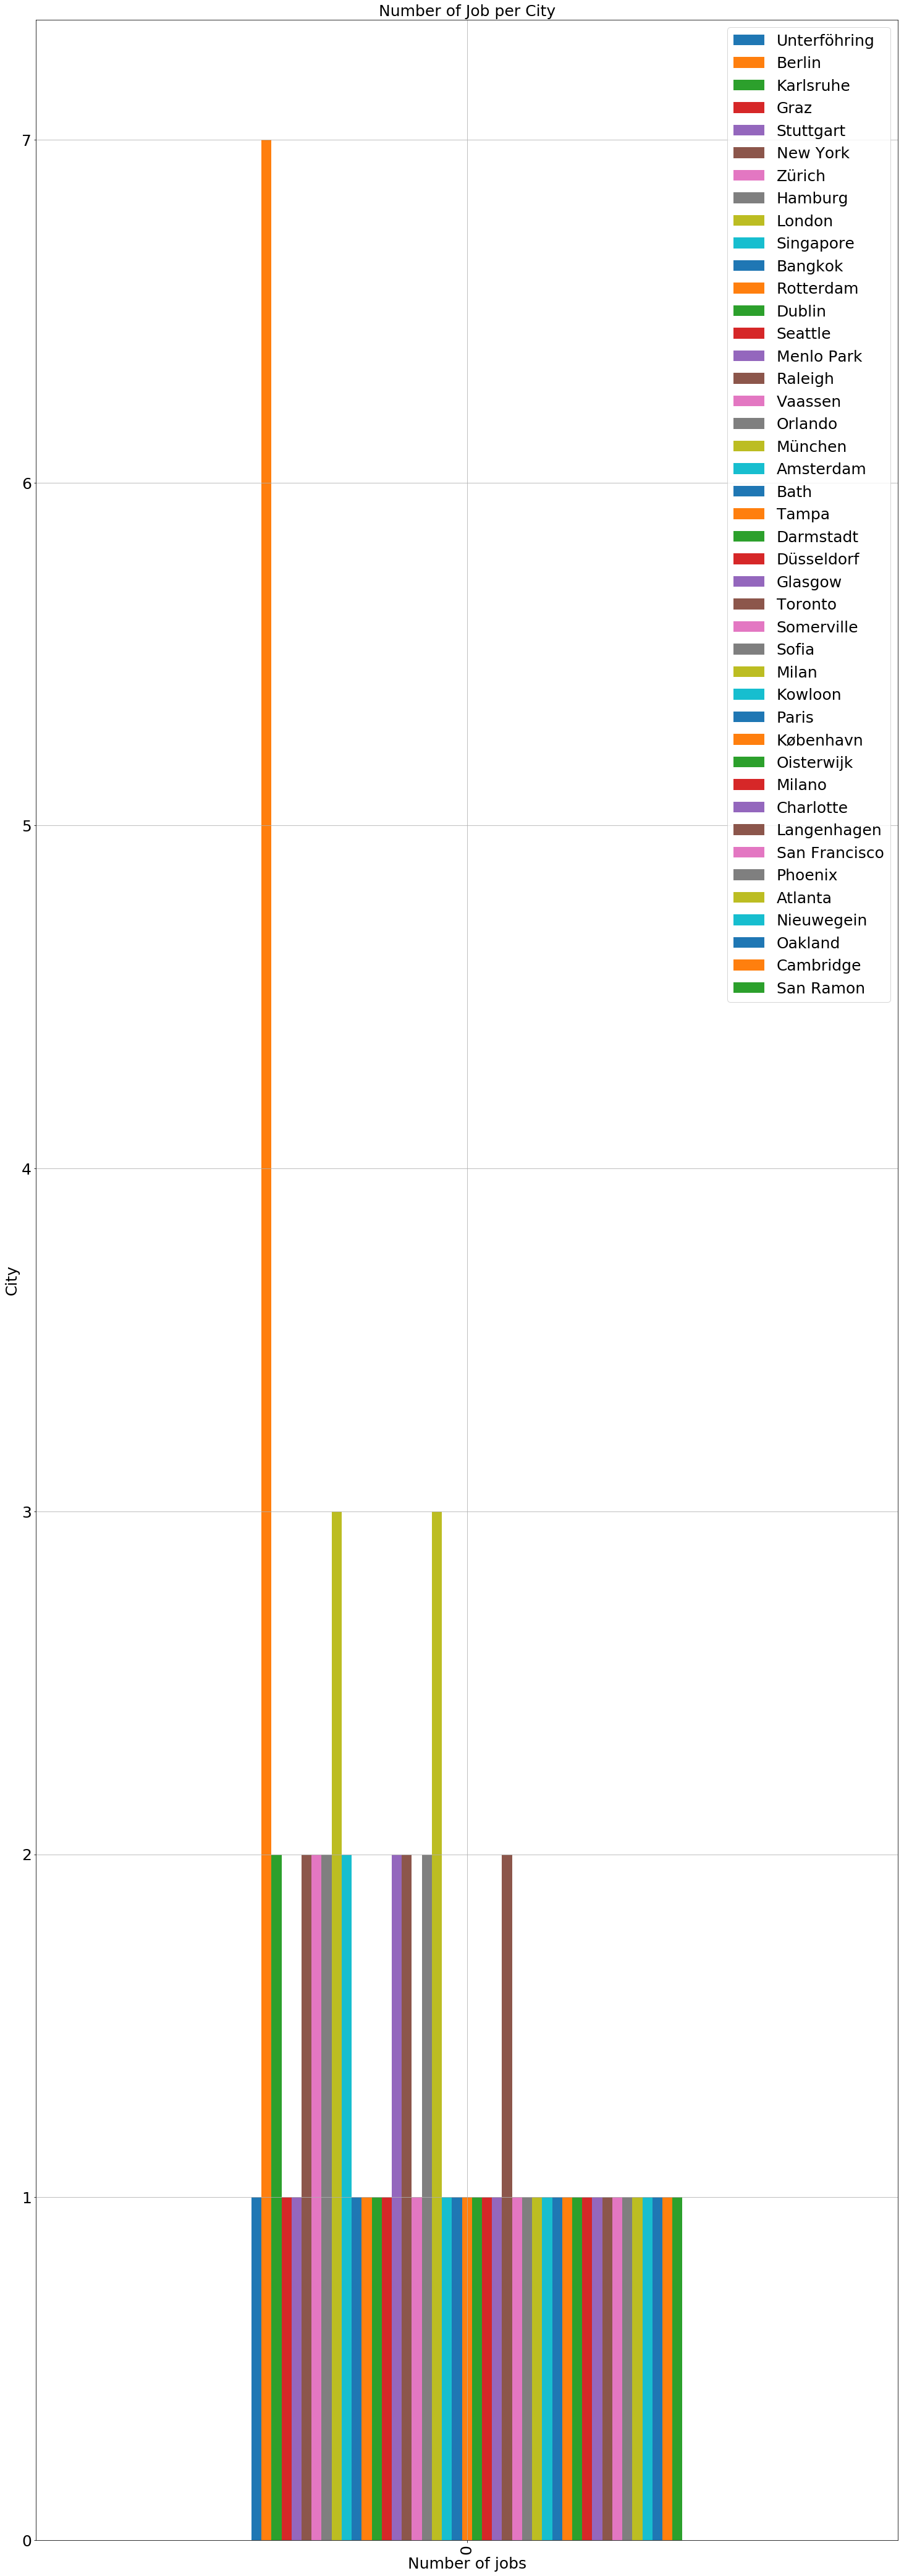

       guid                                               link  \
64   169390  https://stackoverflow.com/jobs/169390/magento-...   
67    91083  https://stackoverflow.com/jobs/91083/php-devel...   
70   172080  https://stackoverflow.com/jobs/172080/software...   
88   167066  https://stackoverflow.com/jobs/167066/full-sta...   
141  172017  https://stackoverflow.com/jobs/172017/senior-w...   
155  164337  https://stackoverflow.com/jobs/164337/senior-b...   
161  171995  https://stackoverflow.com/jobs/171995/web-deve...   
179  154277  https://stackoverflow.com/jobs/154277/php-deve...   
180  171970  https://stackoverflow.com/jobs/171970/laravel-...   
189  171963  https://stackoverflow.com/jobs/171963/junior-p...   
190  171962  https://stackoverflow.com/jobs/171962/senior-f...   
198  171956  https://stackoverflow.com/jobs/171956/software...   
199  171954  https://stackoverflow.com/jobs/171954/web-engi...   
200  171955  https://stackoverflow.com/jobs/171955/web-engi...   
219  17193

In [3]:
import xml.etree.cElementTree as et
import pandas as pd
import datetime
import json
import requests
import urllib.request
import matplotlib.pyplot as plt
from urllib.request import urlopen


def getWeather(city):
    api_address = 'http://api.openweathermap.org/data/2.5/weather?appid=6d21bf1880de23784b5155e0617990d8&q='
    #api_address = 'http://api.openweathermap.org/data/2.5/weather?appid=6d21bf1880de23784b5155e0617990d8&units=metric&q='
    url = api_address + city
    json_data = requests.get(url).json()
    formatted_data = json_data['weather'][0]['description']
    return json_data

def presData(data):
    n_data = dict(
        city = data.get('name'),
        country = data.get('sys').get('country'),
        main_temp = data.get('main').get('temp'),
        main_press = data.get('main').get('pressure'),
        main_humidity = data.get('main').get('humidity'),
        wind = data.get('wind').get('speed'),
        clouds = data.get('clouds').get('all'),
        desc = data.get('weather') 
    )
    return n_data
        
def outputData(n_data):
    print('                                 ')
    print('Ville: {}'.format(n_data['city']))
    print('Pays: {}'.format(n_data['country']))
    print('Temperature actuelle: {}'.format(n_data['main_temp'])+'\xb0'+'C')
    print('Pression atmospherique: {}'.format(n_data['main_press'])+'hpa')
    print('Humidite: {}'.format(n_data['main_humidity'])+'%')
    print('Vitesse du vent: {}'.format(n_data['wind']))
    print('Nuage: {}'.format(n_data['clouds'])+'%')
    #print('Description: {}'.format(n_data['desc']))

def getvalueofnode(node):
    """ return node text or None """
    return node.text if node is not None else None


def main():
    """ main """
    
    """ local feed.xml """
    #parsed_xml = et.parse("feed.xml")
    
    """ online feed.xml"""
    stack_file = urlopen('https://stackoverflow.com/jobs/feed') #stackoverflow parse
    stack_data = stack_file.read() #convert to string
    parsed_xml = et.fromstring(stack_data)
    
    """ set column """
    dfcols = ['guid', 'link', 'author', 'category', 'title', 'description', 'pubDate', 'updated', 'location']
    df_xml = pd.DataFrame(columns=dfcols)

    listCategoryWithoutDoublon = []
        
    """ local """
    #for node in parsed_xml.getroot():
    
    """ online """
    for node in parsed_xml:
        
        for i in node.findall('item'):
            namespaces = {'a10': 'http://www.w3.org/2005/Atom'}
            #namespaces2 = {'a2': 'http://stackoverflow.com/jobs/'}
            guid = i.find('guid')
            link = i.find('link')
            name = i.find('a10:author/a10:name', namespaces)
            category = i.findall('category')
            title = i.find('title')
            description = i.find('description')
            pubDate = i.find('pubDate')
            updated = i.find('a10:updated', namespaces)
            location = i.find('{http://stackoverflow.com/jobs/}location')
                
            listCategory = []
            
            for i in range(0, len(category)):  
                listCategory.append(getvalueofnode(category[i]))
                exist = False
                
                """ list Category without duplicate """
                for j in range(0, len(listCategoryWithoutDoublon)):
                    if(getvalueofnode(category[i])==listCategoryWithoutDoublon[j]):
                        exist = True
                        
                if(exist==False):
                    listCategoryWithoutDoublon.append(getvalueofnode(category[i]))
                       
            """ df """    
            df_xml = df_xml.append(
                pd.Series([getvalueofnode(guid), getvalueofnode(link), getvalueofnode(name),
                        listCategory, getvalueofnode(title), getvalueofnode(description),
                           getvalueofnode(pubDate), getvalueofnode(updated), getvalueofnode(location)],
                          index=dfcols),
            ignore_index=True)

    """ show list of category for choice """
    print(listCategoryWithoutDoublon)
    
    loopCategory = True
    categoryChoice = []
    
    """ ask for category type """   
    while(loopCategory == True):
        exist = False
        category = input("Please enter category: ")
        
        for i in range(0, len(categoryChoice)):
            if(category==categoryChoice[i]):
                print("Category already chosen")
                exist = True
                
        if(exist==False):
            categoryChoice.append(category)
        
        endChoice = input("End choice? (Y/N)")
        
        if(endChoice == "Y" or endChoice =="y"):
            loopCategory=False
            
    temp_best=int(input("Please enter the ideal temperature (margin: 8C): "))

    """ all job related with category """       
    df2 = df_xml
    for i in range(0, len(categoryChoice)):
        mask = df2.category.apply(lambda x: categoryChoice[i] in x)
        df2 = df2[mask]
  
    listLocation = []
    """ all job related with category AND weather """       
    for i in range(0, df2.shape[0]):
        localisation = df2.get_value(df2.index[i], col = "location")
        if localisation is not None:
            localisation_list = localisation.split(", ")
        
        
            #print(localisation_list)
            """ get city / j=1 """       
            for j, value in enumerate(localisation_list, 1):
                if j == 1:
                    #print(value)
                    if value == "Luxembourg City":
                        value = "Luxembourg"
                    if value == "Khwaeng Huai Khwang":
                        value = "Bangkok"
                    if value == "Beograd":
                        value = "Belgrade"
                    if value == "Iai":
                        value == "Bucharest"
                        
                    data = presData(getWeather(value))
                    tempCelsius = data['main_temp']-273.15
                    
                    """ column for plot without duplicate """
                    exist = False
                
                    for k in range(0, len(listLocation)):
                        if(value==listLocation[k]):
                            exist = True

                    if(exist==False):
                        listLocation.append(value)
                    
                    """ delete row not respecting condition """       
                    if not temp_best-8<=tempCelsius<=temp_best+8:
                        df2.drop(df2.index[i])
    
    """ set df columns and row with 0 """
    df_plot = pd.DataFrame(columns=listLocation)
    df_plot.loc[0] = [0 for n in range(len(listLocation))]
    
    """ number job per city / plot """
    for i in range(0, df2.shape[0]):
        localisation = df2.get_value(df2.index[i], col = "location")
        if localisation is not None:
            localisation_list = localisation.split(", ")
        
            """ get city / j=1 """       
            for j, value in enumerate(localisation_list, 1):
                if j == 1:
                    if value == "Luxembourg City":
                        value = "Luxembourg"
                    if value == "Khwaeng Huai Khwang":
                        value = "Bangkok"
                    if value == "Beograd":
                        value = "Belgrade"
                    if value == "Iai":
                        value == "Bucharest"
                        
                    """ counter job / city """
                    for k in range(0, len(listLocation)):
                        if value==listLocation[k]:
                            df_plot.ix[0,value] += 1
        
    """ show number job/city """
    print(df_plot)

    """ set and show df plot bar """
    ax=df_plot.plot(kind='bar', grid=True, figsize=(25,75), fontsize=25)
    ax.set_xlabel("Number of jobs", fontsize=25)
    ax.set_ylabel("City", fontsize=25)
    ax.set_title("Number of Job per City", fontsize=25)
    ax.legend(fontsize=25)
    plt.show()
    
    """ show all perfect job """
    print(df2)
    
main()


